

# Classification Metrics I



---

## Importing libraries
---

We'll need the following libraries for today's lecture:
1. `pandas`
4. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
5. The `load_breast_cancer` function from `sklearn`'s `datasets` module
6. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module
8. The `confusion_matrix` function from `sklearn`'s `metrics` module

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # next classs 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Create dataset
---

Similar to `load_iris` from this morning, we'll call the `load_breast_cancer()` function to create our dataset.

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Create `X` and `y`
---

The dataset labels benign tumors as 1, and malignant tumors as 0. This is contrary to how you typically label data: the more important class (malignant) should be labeled 1.

In [ ]:
# feature and output 
X = data.data
y = 1 - data.target

## Train/Test Split
---

In the cell below, train/test split your `X` and `y` variables. 

**Note** we'll want to create a stratified split.

In [ ]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, stratify = y)

## Scaling our features
---

Because we're using KNN for our model, we'll want to scale our training and testing sets.

In [ ]:
# scaled down my features

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Instantiate and fitting our model
---

In the cells provided, create and fit an instance of `KNeighborsClassifier`. You can use the default parameters.

In [ ]:
# model instantied 
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train_sc,y_train)

0.9765258215962441

In [ ]:
knn.score(X_test_sc,y_test)

0.958041958041958

## Predictions
---

Use our newly fitted KNN model to create predictions from `X_test_scaled`.

In [ ]:
pred = knn.predict(X_test_sc)

## Confusion Matrix
---

We'll create a confusion matrix using the `confusion_matrix` function from `sklearn`'s `metrics` module.

In [ ]:
cm = confusion_matrix(y_test,pred)

In [ ]:
tn, fp, fn , tp = confusion_matrix(y_test,pred).ravel() # I will come back with this 

In [ ]:
tn

89

In [ ]:
cm

array([[89,  1],
       [ 5, 48]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


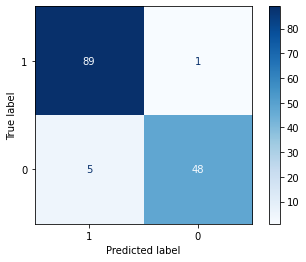

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(knn,X_test_sc,y_test,cmap='Blues',
                      values_format = 'd', display_labels=['1','0'])

## Confusion DataFrame
---

The confusion matrix we just created isn't very explanatory, so let's drop it into a pandas `DataFrame`.

In [ ]:
cm_df = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

In [ ]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,89,1
Actual N,5,48


In [ ]:
(89+48)/(89+5+1+48)

0.958041958041958

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,plot_roc_curve

In [ ]:
accuracy_score(y_test,pred)

0.958041958041958

In [ ]:
recall_score(y_test,pred)

0.9056603773584906

In [ ]:
precision_score(y_test,pred)

0.9795918367346939

In [ ]:
knn

## Calculate recall
---

<details>
    <summary>Need a hint?</summary>
    Recall = Sensitivity, and there are no p's in sensitivity.
</details>

In [ ]:
49 / (49 + 4)

0.9245283018867925

## How many Type I errors are there?
---

<details>
    <summary>Need a hint?</summary>
    Type I = False positive
</details>

In [ ]:
# FP
4

## How many Type II errors are there?
---
<details>
    <summary>Need a hint?</summary>
    Type II = False negatives
</details>

In [ ]:
# FN
1

## Poll
---

/poll "Which error is worse" "Type I" "Type II" anonymous limit 1

## Calculate the sensitivity
---

<details>
    <summary>Need a hint?</summary>
    There are no p's in sensitivity: TP/P
</details>

## Calculate the specificity
---

<details>
    <summary>Need a hint?</summary>
    There is a p in specificity, therefore there are no p's in the calculation: TN/N
</details>

In [ ]:
4 / (4 + 49)

0.07547169811320754

# ROC Curve

In [ ]:
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


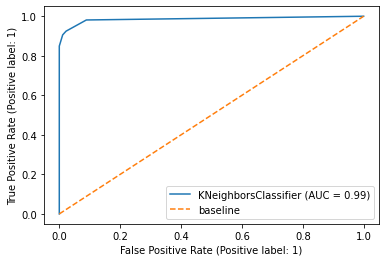

In [ ]:
plot_roc_curve(knn,X_test_sc,y_test)
plt.plot ([0,1],[0,1],
          label = 'baseline', linestyle='--' )
plt.legend();